In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("Preprocessed Tamil Nadu ChatGPT Data.csv")
dataset

,Age,Gender,District,Occupation,Usage Frequency,Main Purpose,Language Used,User Rating,Education Level,Actions Taken,Device Used,Time Spent Hours
0,25,1,0,10,3.0,3,1,5,2.0,1,3,0.5
1,28,1,8,4,3.0,4,1,5,3.0,1,1,3.5
2,48,0,0,3,3.0,1,2,5,0.0,1,3,0.5
3,54,1,0,1,3.0,0,2,5,0.0,1,3,0.5
4,27,0,12,6,3.0,4,0,5,2.0,1,3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
105,17,0,3,10,2.0,3,1,4,0.0,0,3,0.5
106,18,1,17,0,1.0,3,1,3,1.0,1,3,0.5
107,28,0,8,2,0.0,5,1,5,2.0,0,3,0.5
108,28,0,12,3,0.0,3,1,2,2.0,0,3,0.5


In [3]:
dataset.columns

Index(['Age', 'Gender', 'District', 'Occupation', 'Usage Frequency',
       'Main Purpose', 'Language Used', 'User Rating', 'Education Level',
       'Actions Taken', 'Device Used', 'Time Spent Hours'],
      dtype='object')

<span style="color: red; font-size: 20px;">Central Tendency</span>

In [4]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode"])
#numerical columns
num_cols = ['Age', 'User Rating', 'Time Spent Hours']
for col in num_cols:
    mean_val = dataset[col].mean()
    median_val = dataset[col].median()
    mode_val = dataset[col].mode()[0]
    
    descriptive[col] = [mean_val, median_val, mode_val]

In [5]:
# Display final table
descriptive

,Age,User Rating,Time Spent Hours
Mean,31.172727,4.318182,1.140909
Median,28.000000,5.000000,0.500000
Mode,27.000000,5.000000,0.500000


Age (Mean = 31.446429, Median = 28.0, Mode = 27.0 ): 
The average age of ChatGPT users in Tamil Nadu is around 31 years.
The most common and middle ages around 27–28 years. 
This indicates that young adults form the majority of users, mainly in their late 20s to early 30s.

User Rating (Mean = 4.285714, Median = 5, Mode = 5):
The average satisfaction rating is 4.3 out of 5.
Most users rated ChatGPT 5 stars. 
This shows high user satisfaction and trust in ChatGPT’s responses and usefulness.

Time Spent Hours (Mean = 1.089286, Median = 0.5, Mode = 0.5):
On average, users spend about 1 hour per day using ChatGPT. 
The median and mode being 0.5 hours (≈ 30 minutes) suggest that most users engage briefly but consistently, with a few spending longer durations that slightly increase the mean.

Overall Insight:
Most ChatGPT users in Tamil Nadu are young adults (~31 years) who rate ChatGPT very highly (mostly 5 stars) and spend around 30 minutes to 1 hour daily using it for various personal or professional purposes.

In [6]:
descriptive=pd.DataFrame(index=["Median","Mode"])
#Ordinal (ordered categories)
num_cols = ['Usage Frequency', 'Education Level']
for col in num_cols:
    median_val = dataset[col].median()
    mode_val = dataset[col].mode()[0]
    
    descriptive[col] = [median_val, mode_val]

In [7]:
descriptive

,Usage Frequency,Education Level
Median,3.0,2.0
Mode,3.0,2.0


Usage Frequency (Median & Mode: 3.0): 
The median and mode both being 3 indicate that most users use ChatGPT frequently (likely “Daily” or “More than 1 Hour” depending on your scale). 
This shows high engagement levels and regular dependency on AI tools.

Education Level	(Median & Mode: 2.0):	
The median and mode of 2 suggest that most users are graduates or postgraduates, representing a well-educated audience with strong digital literacy and professional or academic interest in ChatGPT.

Overall Insight:
The typical ChatGPT user in Tamil Nadu is a well-educated graduate or postgraduate who uses ChatGPT frequently (daily or several hours per week) — indicating strong awareness and consistent adoption of AI tools.

In [8]:
descriptive=pd.DataFrame(index=["Mode"])
#Nominal (no order)
num_cols = ['Gender', 'Language Used', 'Device Used', 'Actions Taken']
for col in num_cols:
    mode_val = dataset[col].mode()[0]
    
    descriptive[col] = [mode_val]

In [9]:
descriptive

,Gender,Language Used,Device Used,Actions Taken
Mode,0,1,3,1


Gender (Mode: 0)
Female (if 0 = Female, 1 = Male)
The mode value of 0 indicates that female users form the majority among ChatGPT users in Tamil Nadu.

Language Used (Mode: 1)	
English (if 0 = Tamil, 1 = English)	
A mode of 1 shows that most users primarily use ChatGPT in English
Suggesting that English is preferred for AI communication even in regional contexts.

Device Used	(Mode: 2)	
Mobile (if 0 = Laptop, 1 = Desktop, 2 = Mobile)	
The mode value of 2 implies that mobile devices are the most common way users access ChatGPT, highlighting convenience and accessibility.

Actions Taken (Mode: 1)	
Yes (if 1 = Took action)	
A mode of 1 indicates that most users acted on ChatGPT’s suggestions, showing trust and real-world reliance on AI outputs.

Overall Insight

Majority of ChatGPT users in Tamil Nadu are female, English-speaking, and mobile users, primarily using ChatGPT for education or work-related purposes. Most of them take real actions based on ChatGPT’s responses, showing strong adoption and trust in AI tools.

<span style="color: red; font-size: 20px;">Percentile, IQR, Outliers, Kurtosis & Skewness</span>

In [10]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                               "Q3:75%", "Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max", "kurtosis","skew"])
num_cols = ['Age', 'User Rating', 'Time Spent Hours']
for col in num_cols:
    mean_val = dataset[col].mean()
    median_val = dataset[col].median()
    mode_val = dataset[col].mode()[0]
    q1 = dataset[col].quantile(0.25)
    q2 = dataset[col].quantile(0.50)
    q3 = dataset[col].quantile(0.75)
#q99 = dataset[col].quantile(0.99)
    q4 = dataset[col].quantile(1.00)
    iqr = q3 - q1
    rule_1_5 = 1.5 * iqr
    lesser = q1 - rule_1_5
    greater = q3 + rule_1_5
    min_val = dataset[col].min()
    max_val = dataset[col].max()
    kurtosis_val = dataset[col].kurtosis()
    skew_val = dataset[col].skew()
    
    # Fill the summary table
    descriptive[col] = [mean_val, median_val, mode_val, q1, q2, q3, q4, iqr, rule_1_5, lesser, greater, min_val, max_val, kurtosis_val, skew_val]



In [11]:
# Round values for cleaner view
descriptive = descriptive.round(2)
# Display the summary
print(descriptive)

            Age  User Rating  Time Spent Hours
Mean      31.17         4.32              1.14
Median    28.00         5.00              0.50
Mode      27.00         5.00              0.50
Q1:25%    27.00         4.00              0.50
Q2:50%    28.00         5.00              0.50
Q3:75%    34.75         5.00              1.50
Q4:100%   59.00         5.00              3.50
IQR        7.75         1.00              1.00
1.5rule   11.62         1.50              1.50
Lesser    15.38         2.50             -1.00
Greater   46.38         6.50              3.00
Min       17.00         1.00              0.50
Max       59.00         5.00              3.50
kurtosis   0.87         1.80              0.86
skew       0.98        -1.48              1.48


Age: The mean (31.17) is higher than the median (28.00), and the skewness is positive (0.98), indicating the presence of older individuals skewing the data to the right. The minimum age is 17.00, and the maximum is 59.00, with a wide IQR of 7.75.

User Rating: The mode (5.00) is the highest value, and the mean (4.32) is lower than the median (5.00), with a negative skewness (-1.48). This suggests that most users give high ratings. The minimum rating of 1.00 is a possible outlier.

Time Spent (Hours): The mean (1.14) is much higher than the median and mode (both 0.50), and the skewness is highly positive (1.48). This indicates that a few users spend a much greater amount of time than the majority. The maximum time of 3.50 is likely an outlier.

<span style="color: red; font-size: 20px;">Frequency</span>

In [12]:
def freqTable(columnName, dataset):
    # Create empty DataFrame with columns
    freqTable = pd.DataFrame(columns=["Unique_Values", "Frequency", "Relative Frequency", "Cumulative Frequency"])
    
    # Calculate frequency
    value_counts = dataset[columnName].value_counts()
    
    # Fill the table
    freqTable["Unique_Values"] = value_counts.index
    freqTable["Frequency"] = value_counts.values
    
    # Relative frequency (auto total count instead of hardcoding 103)
    freqTable["Relative Frequency"] = (freqTable["Frequency"] / len(dataset)).round(4)
    
    # Cumulative sum
    freqTable["Cumulative Frequency"] = freqTable["Relative Frequency"].cumsum().round(4)
    
    return freqTable

In [13]:
freqTable("Device Used", dataset)

,Unique_Values,Frequency,Relative Frequency,Cumulative Frequency
0,3,84,0.7636,0.7636
1,1,20,0.1818,0.9454
2,2,2,0.0182,0.9636
3,4,2,0.0182,0.9818
4,0,2,0.0182,1.0000


The dataset is highly skewed, with the unique value '3' being overwhelmingly dominant.
Most Common Value: The value '3' appears 84 times, representing about 76% of the dataset.
Other Values: The values '1', '2', '4', and '0' are significantly less common, appearing only a handful of times combined.
Mode: The mode of this dataset is '3'.

<span style="color: red; font-size: 20px;">Histogram</span>

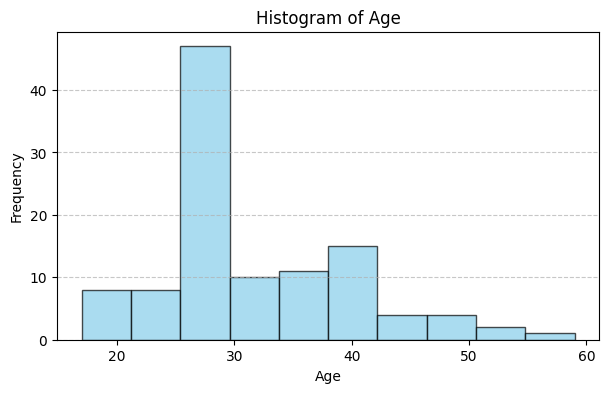

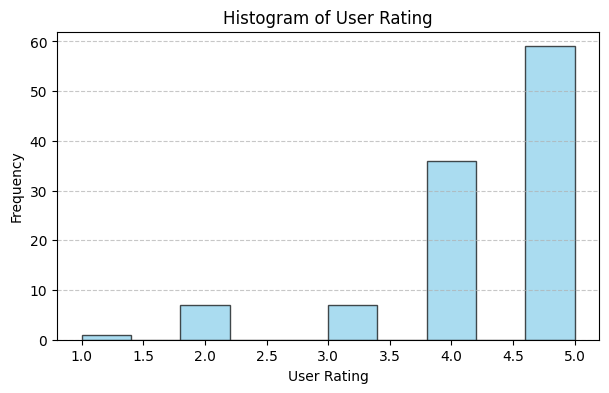

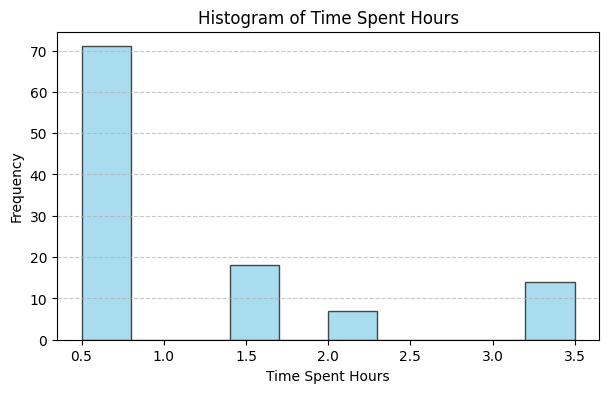

In [14]:
import matplotlib.pyplot as plt
num_cols = ['Age', 'User Rating', 'Time Spent Hours']

for col in num_cols:
    plt.figure(figsize=(7,4))
    plt.hist(dataset[col], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Age: The age distribution is positively skewed, indicating that most individuals are clustered in the younger age brackets.
while a smaller number of individuals are significantly older. 
The most frequent age group is between approximately 26 and 30 years old, with frequencies decreasing for both younger and older groups.

User Rating: The user rating data is negatively skewed, with the majority of ratings being high. 
The most frequent rating is between 4.5 and 5.0. There is a sharp drop-off in frequency for lower ratings, suggesting that most users are satisfied, with only a small number giving low ratings.

Time Spent Hours: The time spent data is highly positively skewed. 
The majority of individuals spend a short amount of time, with the most frequent interval being between 0.5 and 1.0 hours. 
There is a long tail extending to the right, indicating that a small number of individuals spend a much greater amount of time.

<span style="color: red; font-size: 20px;">Normal Distribution & Standard Normal Distribution</span>

In [15]:
import seaborn as sns
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=4.318, Standard Deviation=0.918
The area between range(40,80):0.0


C:\Users\GOWTHAM\AppData\Local\Temp\ipykernel_12992\3808921059.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.0

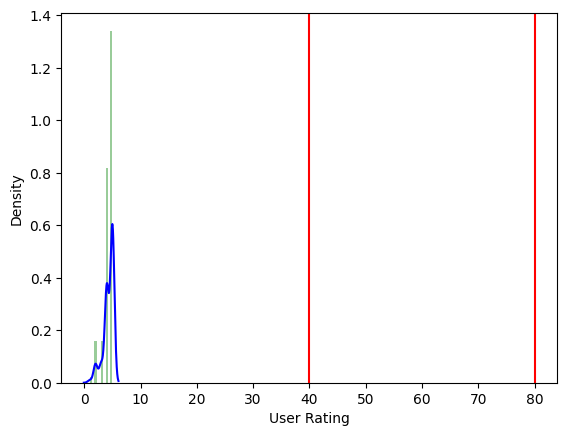

In [16]:
get_pdf_probability(dataset["User Rating"],40,80)

In [17]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['User Rating'])
ecdf(78)

1.0

In [18]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()

C:\Users\GOWTHAM\AppData\Local\Temp\ipykernel_12992\4109782476.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


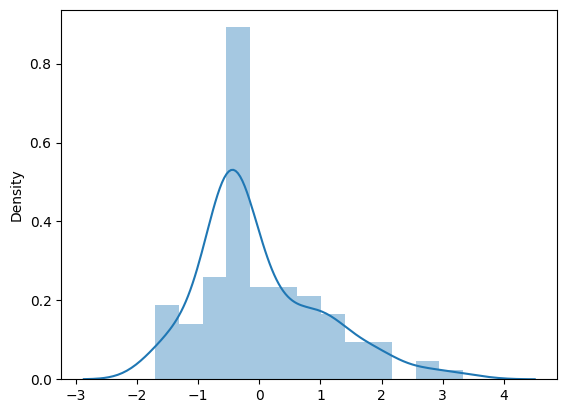

In [19]:
stdNBgraph(dataset["Age"])

<span style="color: red; font-size: 20px;">Cumulative Distribution Function</span>

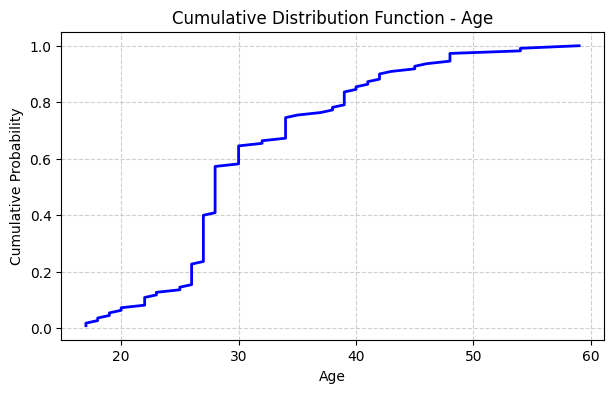

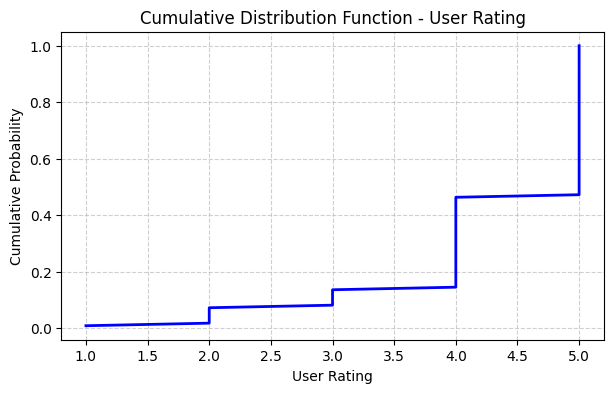

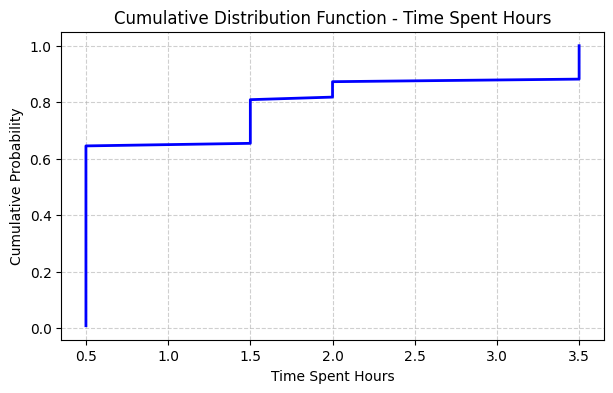

In [20]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sorted_data = np.sort(dataset[col].dropna())
    cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, cdf, color='blue', linewidth=2)
    plt.title(f"Cumulative Distribution Function - {col}")
    plt.xlabel(col)
    plt.ylabel("Cumulative Probability")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

Age: The median age is the age at which the cumulative probability is 0.50 (50%). 
Based on the graph, the median age is approximately 28 years old.

User Rating: Based on graph, more than 50% of users gave 4 to 5 rating

TimeSpent Hours: Based on graph, more than 80% of users spending 0.5 to 1.5 hours per day.

<span style="color: red; font-size: 20px;">Probability Density Function</span>

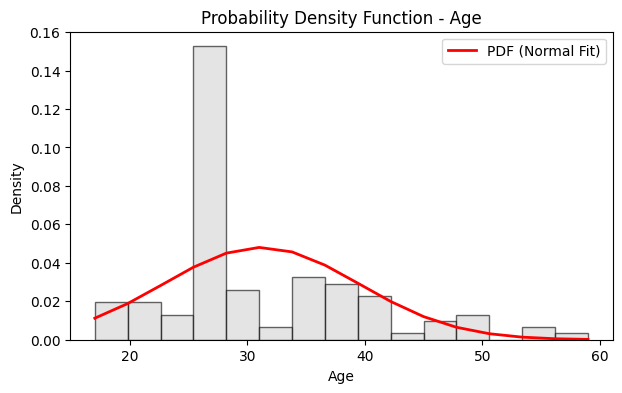

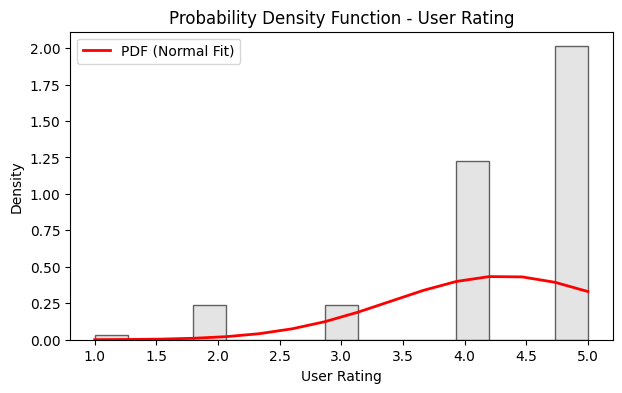

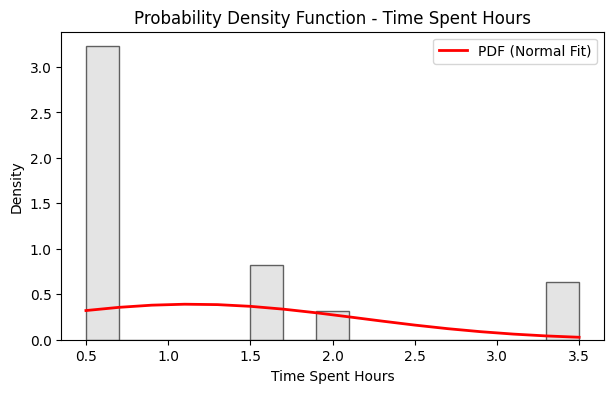

In [21]:
from scipy.stats import norm

for col in num_cols:
    plt.figure(figsize=(7,4))
    # Plot histogram as density
    count, bins, ignored = plt.hist(dataset[col], bins=15, density=True, color='lightgray', edgecolor='black', alpha=0.6)
    
    # Fit normal curve
    mu, sigma = norm.fit(dataset[col].dropna())
    pdf = norm.pdf(bins, mu, sigma)
    
    # Plot PDF
    plt.plot(bins, pdf, color='red', linewidth=2, label='PDF (Normal Fit)')
    plt.title(f"Probability Density Function - {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

Age: The majority of the data is concentrated in the younger age groups, particularly around 26-27 years old, which is the tallest bar. 

User Rating: The majority of the data is concentrated in high rating, particularly around 4.0 & 5.0 rating, which is the tallest bar. 

Time Spent Hours: The majority of the data is concentrated in half hour, particularly 0.5 hours, which is the tallest bar. 

<span style="color: red; font-size: 23px;">Bivariate</span>

<span style="color: red; font-size: 20px;">Covariance & Correlation</span>

In [22]:
num_cols = ['Age', 'User Rating', 'Time Spent Hours']

# Covariance matrix
cov_matrix = dataset[num_cols].cov()

In [23]:
cov_matrix

,Age,User Rating,Time Spent Hours
Age,69.630442,1.128023,0.255254
User Rating,1.128023,0.842786,0.211635
Time Spent Hours,0.255254,0.211635,1.051063


Age and User Rating: The covariance is 1.128023. 
This positive value suggests a weak positive relationship, meaning that as age increases, user ratings tend to slightly increase.

Age and Time Spent Hours: The covariance is 0.255254. 
This positive value indicates a very weak positive relationship, suggesting that as age increases, time spent also tends to slightly increase.

User Rating and Time Spent Hours: The covariance is 0.211635. 
This positive value suggests a very weak positive relationship, meaning that as a user rating increases, time spent tends to slightly increase.

In [24]:
corr_matrix = dataset[num_cols].corr()
corr_matrix

,Age,User Rating,Time Spent Hours
Age,1.000000,0.147252,0.029837
User Rating,0.147252,1.000000,0.224861
Time Spent Hours,0.029837,0.224861,1.000000


Age and User Rating: The correlation is 0.147252. 
This is a very weak positive correlation, suggesting that there is almost no linear relationship between a person's age and their user rating.

Age and Time Spent Hours: The correlation is 0.029837. 
This is an extremely weak positive correlation, indicating a negligible linear relationship between age and the time a person spends.

User Rating and Time Spent Hours: The correlation is 0.224861. 
This represents a weak positive correlation, suggesting a slight tendency for higher user ratings to be associated with more time spent.

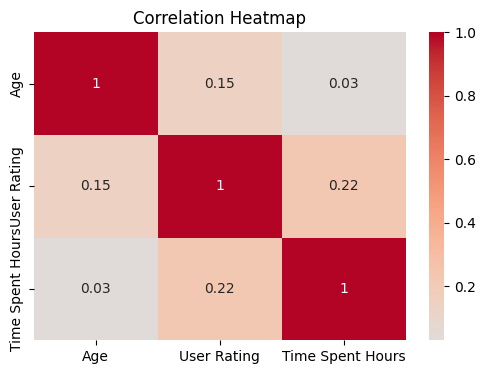

In [25]:
# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

Age and User Rating: The correlation coefficient is 0.15. 
This indicates a very weak positive correlation between age and user rating. 
This suggests that as age increases, user ratings tend to slightly increase, but the relationship is not strong.

Age and Time Spent Hours: The correlation coefficient is 0.03. 
This is an extremely weak positive correlation, indicating a negligible linear relationship between age and the time a person spends. 
This means that a person's age is not a good predictor of how much time they will spend.

User Rating and Time Spent Hours: The correlation coefficient is 0.22. 
This represents a weak positive correlation, suggesting a slight tendency for higher user ratings to be associated with more time spent.

<span style="color: red; font-size: 20px;">t-Test — Compare Means of Two Groups</span>

In [26]:
from scipy.stats import ttest_ind

group1 = dataset[dataset['Gender'] == 0]['Time Spent Hours']   # Example: Male
group2 = dataset[dataset['Gender'] == 1]['Time Spent Hours']   # Example: Female

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

T-statistic: -0.373, P-value: 0.710


P Value is greater than 0.05
Hence accept null hypothesis & reject alternate hypothesis
There is no significant similarity between gender and time spent hours

<span style="color: red; font-size: 20px;">VIF — Check Multicollinearity (Variance Inflation Factor)</span>

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
calc_vif(dataset[["Time Spent Hours","Age","User Rating"]])

,variables,VIF
0,Time Spent Hours,2.369310
1,Age,10.938873
2,User Rating,12.282442


In [29]:
calc_vif(dataset[["Time Spent Hours","Age"]])

,variables,VIF
0,Time Spent Hours,2.110107
1,Age,2.110107


In [30]:
calc_vif(dataset[["Age","User Rating"]])

,variables,VIF
0,Age,10.93874
1,User Rating,10.93874


In [31]:
calc_vif(dataset[["Time Spent Hours","User Rating"]])

,variables,VIF
0,Time Spent Hours,2.369281
1,User Rating,2.369281


The primary issue of multicollinearity exists between the Age and User Rating variables. 
This strong relationship between these two variables.
It could make difficult to determine the independent effect of each variable on a dependent variable in a regression model.

<span style="color: red; font-size: 20px;">ANOVA (Analysis of Variance)</span>

In [32]:
import scipy.stats as stats

stats.f_oneway(dataset['Time Spent Hours'],dataset['User Rating'],dataset['Age'])

F_onewayResult(statistic=1255.859322421766, pvalue=3.491831637683279e-154)

If p-value < 0.05, that factor has a significant effect.
If p-value > 0.05, there’s no significant effect.
#p value is more than 0.05
#Hence accept Null hypothesis and Reject Alternate hypothsis
#H0- There is no similarity between Time Spent Hours, User Rating & Age. 
#H1- There is similarity between Time Spent Hours, User Rating & Age.